<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-21 15:26:10--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  79.8MB/s    in 1.9s    

2025-04-21 15:26:14 (79.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [25]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [26]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [27]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [28]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time       None  Apples   
4   Student, full-time       None  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                               None   
4                                 

## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [11]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


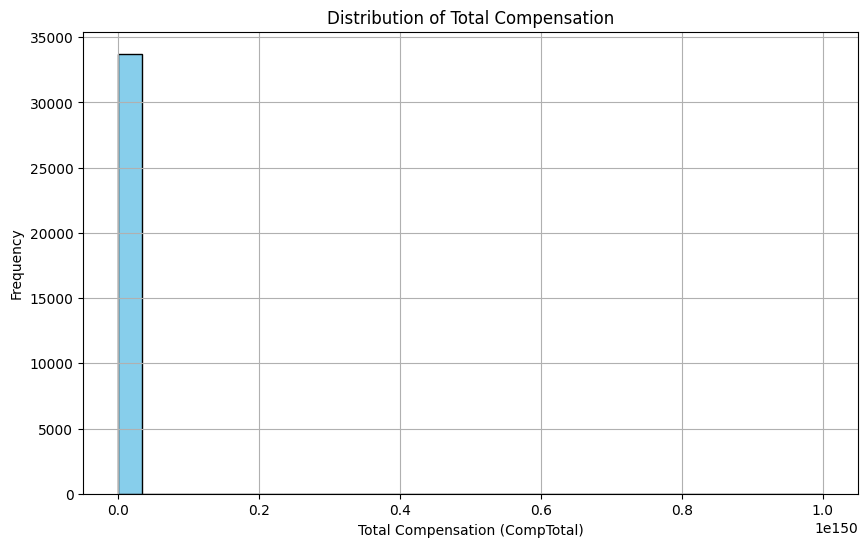

In [29]:
## Write your code here
query = "SELECT CompTotal FROM main" 
df = pd.read_sql_query(query, conn)
plt.figure(figsize=(10, 6))
plt.hist(df['CompTotal'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation (CompTotal)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Box Plots**

Plot a box plot of Age.


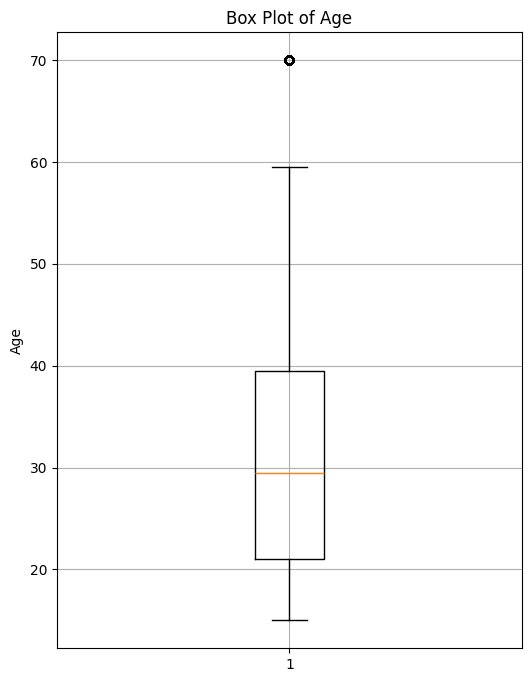

In [30]:

query = "SELECT Age FROM main"
df = pd.read_sql_query(query, conn)

# Filter out non-age rows (those that don't match expected age ranges)
df = df[df['Age'].str.contains(r'\d{1,2}-\d{1,2} years old|Under 18|65 years or older', na=False)]

# Function to convert age range to midpoint
def convert_age(age_str):
    if 'Under 18' in age_str:
        return 15  # Assign 15 for "Under 18"
    elif '65 years or older' in age_str:
        return 70  # Assign 70 for "65 years or older"
    else:
        # Extract the lower and upper bounds of the range
        parts = age_str.split(' ')[0].split('-')
        if len(parts) == 1:
            return int(parts[0])  # Single age (e.g., "25")
        else:
            return (int(parts[0]) + int(parts[1])) / 2  # Midpoint of the range

# Convert the Age column
df['Age_numeric'] = df['Age'].apply(convert_age)

# Drop rows with NaN values in Age_numeric
age_data = df['Age_numeric'].dropna()

# Plot Box Plot
plt.figure(figsize=(6, 8))
plt.boxplot(age_data)
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.grid(True)
plt.show()


### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


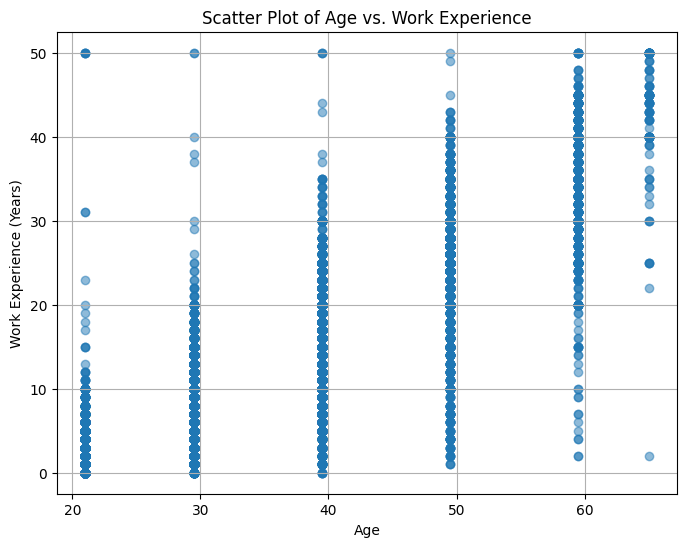

In [33]:
## Write your code here
# Query Age and Work Experience data
query_data = "SELECT Age, WorkExp FROM main"
df = pd.read_sql_query(query_data, conn)

def convert_age(age_str):
    # Handle invalid or unexpected entries
    if age_str in ['Prefer not to answer', 'Prefer not to say']:
        return None  # Return NaN for non-numeric entries
    
    try:
        # If the age is a single value (e.g., '25')
        if '-' not in age_str:
            return int(age_str.split(' ')[0])  # Single age (e.g., "25")
        
        # If the age is a range (e.g., '25-34 years old')
        parts = age_str.split(' ')[0].split('-')
        if len(parts) == 1:
            return int(parts[0])  # Single age (e.g., "25")
        else:
            return (int(parts[0]) + int(parts[1])) / 2  # Midpoint of the range
    except Exception as e:
        return None  # Handle any unexpected errors (e.g., parsing errors)

# Now try converting the Age column again
df['Age_numeric'] = df['Age'].apply(convert_age)

# Drop rows with NaN values in Age_numeric and WorkExp_numeric for plotting
df_data_clean = df.dropna(subset=['Age_numeric', 'WorkExp'])

# Plot Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(df_data_clean['Age_numeric'], df_data_clean['WorkExp'], alpha=0.5)
plt.title('Scatter Plot of Age vs. Work Experience')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')
plt.grid(True)
plt.show()


**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


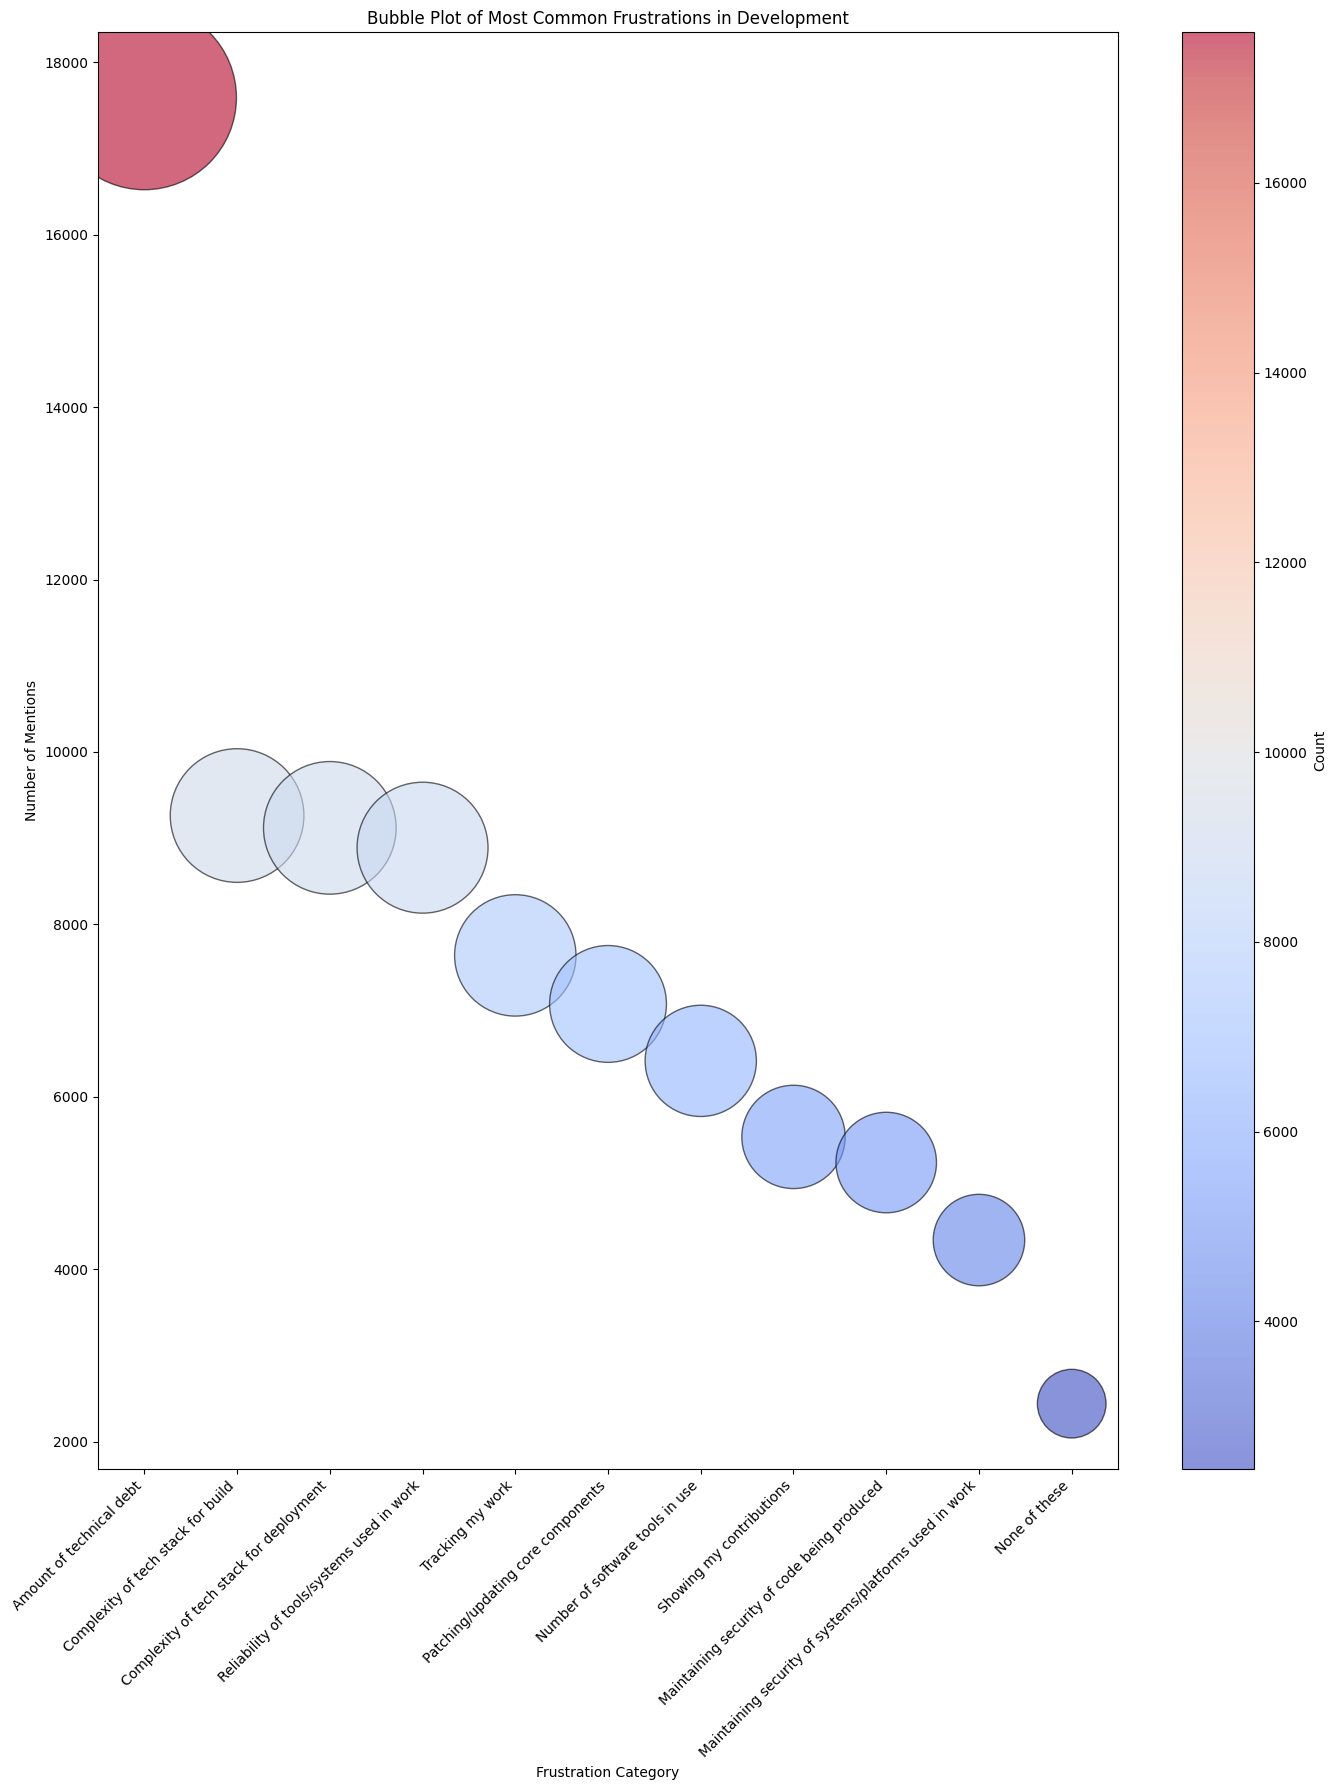

In [44]:
# # ## Write your code here
# # Query TimeSearching, Frustration, and Age data
# query_bubble_data = "SELECT TimeSearching, Frustration, Age FROM main"
# df = pd.read_sql_query(query_bubble_data, conn)

# # Ensure Age is converted to numeric as before
# df['Age_numeric'] = df['Age'].apply(convert_age)

# # Drop rows with NaN values
# df_bubble_clean = df.dropna(subset=['TimeSearching', 'Frustration', 'Age_numeric'])

# # Bubble plot
# plt.figure(figsize=(28, 36))
# plt.scatter(df_bubble_clean['TimeSearching'], df_bubble_clean['Frustration'], 
#             s=df_bubble_clean['Age_numeric'] * 20,  # Size of bubbles based on Age
#             alpha=0.5, c=df_bubble_clean['Age_numeric'], cmap='viridis')
# plt.title('Bubble Plot of Time Searching vs. Frustration (Bubble Size = Age)')
# plt.xlabel('Time Searching (Months)')
# plt.ylabel('Frustration Level')
# plt.colorbar(label='Age')
# plt.show()

# ## Write your code here

# Query TimeSearching, Frustration, and Age data
query_bubble_data = "SELECT TimeSearching, Frustration, Age FROM main"
df = pd.read_sql_query(query_bubble_data, conn)

# Define a function to convert Age category to numeric
def convert_age(age):
    if age == "Under 18 years old":
        return 17
    elif age == "18-24 years old":
        return 21
    elif age == "25-34 years old":
        return 30
    elif age == "35-44 years old":
        return 40
    elif age == "45-54 years old":
        return 50
    elif age == "55-64 years old":
        return 60
    elif age == "65 years or older":
        return 65
    else:
        return None

# Ensure Age is converted to numeric
df['Age_numeric'] = df['Age'].apply(convert_age)

# Drop rows with missing Frustration or Age_numeric
df_bubble_clean = df.dropna(subset=['Frustration', 'Age_numeric'])

# Remove rows where Frustration is just 'NA' or empty
df_bubble_clean = df_bubble_clean[df_bubble_clean['Frustration'].str.upper() != 'NA']

# Split the Frustration string into multiple rows
df_bubble_clean['Frustration'] = df_bubble_clean['Frustration'].str.split(';')
df_exploded = df_bubble_clean.explode('Frustration')

# Clean up whitespace
df_exploded['Frustration'] = df_exploded['Frustration'].str.strip()

# Count each unique frustration category
frustration_counts = df_exploded['Frustration'].value_counts().reset_index()
frustration_counts.columns = ['Frustration', 'Count']

# Bubble plot of Frustration category vs Count (bubble size = Count)
plt.figure(figsize=(14, 18))
plt.scatter(
    frustration_counts['Frustration'],
    frustration_counts['Count'],
    s=frustration_counts['Count'] * 1,  # Bubble size
    alpha=0.6,
    c=frustration_counts['Count'],
    cmap='coolwarm',
    edgecolors='black'
)

# Styling the plot
plt.xticks(rotation=45, ha='right')
plt.title('Bubble Plot of Most Common Frustrations in Development')
plt.xlabel('Frustration Category')
plt.ylabel('Number of Mentions')
plt.colorbar(label='Count')
plt.tight_layout()
plt.show()



### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


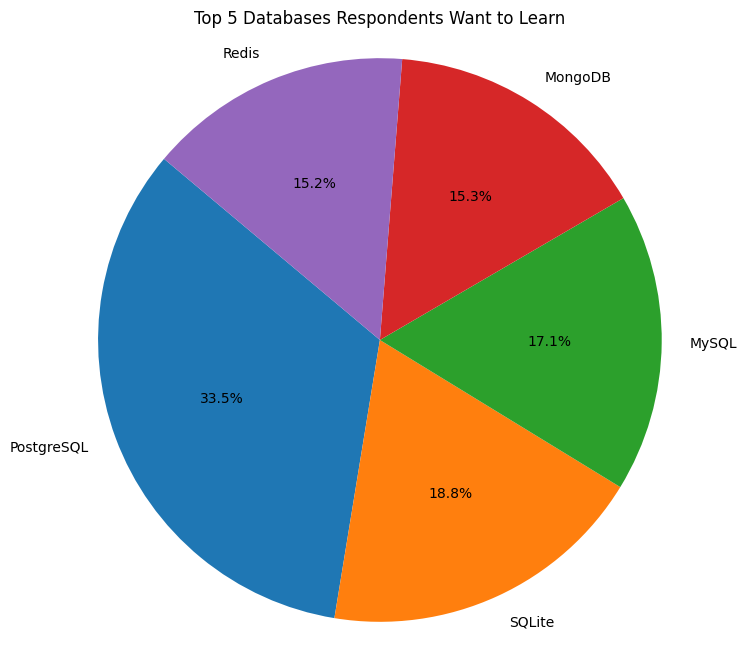

In [45]:
## Write your code here
# ## Write your code here
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Split and count all databases
df['DatabaseWantToWorkWith'] = df['DatabaseWantToWorkWith'].str.split(';')
df_exploded = df.explode('DatabaseWantToWorkWith')
df_exploded['DatabaseWantToWorkWith'] = df_exploded['DatabaseWantToWorkWith'].str.strip()

top_5 = df_exploded['DatabaseWantToWorkWith'].value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_5.values, labels=top_5.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Databases Respondents Want to Learn")
plt.axis('equal')
plt.show()


**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


/tmp/ipykernel_731/3920008901.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TimeSearching_numeric'] = df_filtered['TimeSearching'].map(time_map)
/tmp/ipykernel_731/3920008901.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TimeAnswering_numeric'] = df_filtered['TimeAnswering'].map(time_map)


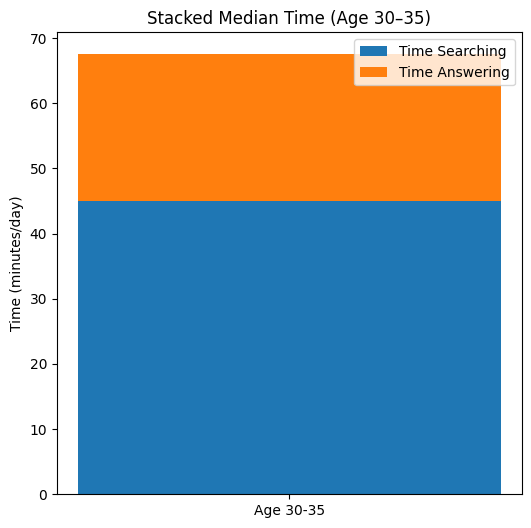

In [47]:
# ## Write your code here

# Fetch relevant columns
query = "SELECT Age, TimeSearching, TimeAnswering FROM main WHERE TimeSearching IS NOT NULL AND TimeAnswering IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Convert Age category to numeric midpoints
def convert_age(age):
    if age == "25-34 years old":
        return 30
    elif age == "35-44 years old":
        return 40
    else:
        return None

df['Age_numeric'] = df['Age'].apply(convert_age)
df_filtered = df[df['Age_numeric'] == 30]  # Approx age group 30–35

# Convert TimeSearching and TimeAnswering to numeric minutes per day
time_map = {
    "Less than 15 minutes a day": 10,
    "15-30 minutes a day": 22.5,
    "30-60 minutes a day": 45,
    "60-120 minutes a day": 90,
    "Over 120 minutes a day": 150,
}

df_filtered['TimeSearching_numeric'] = df_filtered['TimeSearching'].map(time_map)
df_filtered['TimeAnswering_numeric'] = df_filtered['TimeAnswering'].map(time_map)

# Get medians
median_values = {
    'TimeSearching': df_filtered['TimeSearching_numeric'].median(),
    'TimeAnswering': df_filtered['TimeAnswering_numeric'].median()
}

# Plot stacked bar chart
plt.figure(figsize=(6, 6))
plt.bar(['Age 30-35'], median_values['TimeSearching'], label='Time Searching')
plt.bar(['Age 30-35'], median_values['TimeAnswering'], bottom=median_values['TimeSearching'], label='Time Answering')
plt.title("Stacked Median Time (Age 30–35)")
plt.ylabel("Time (minutes/day)")
plt.legend()
plt.show()


### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


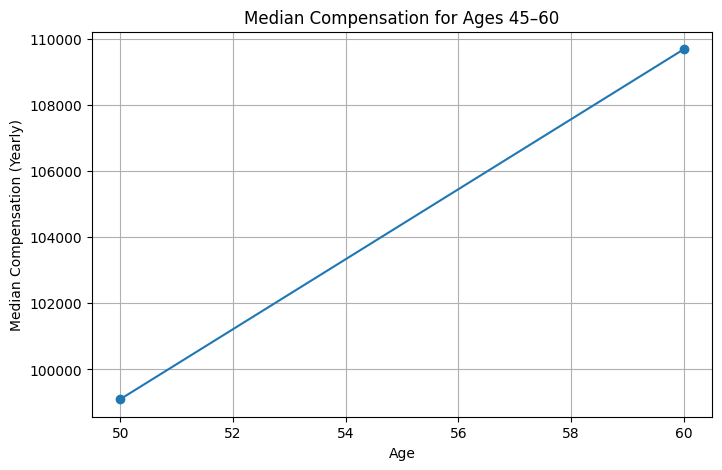

In [49]:
## Write your code here
# ## Write your code here

query = "SELECT Age, ConvertedCompYearly as CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Convert Age to midpoints
def convert_age(age):
    if age == "45-54 years old":
        return 50
    elif age == "55-64 years old":
        return 60
    else:
        return None

df['Age_numeric'] = df['Age'].apply(convert_age)
df_filtered = df.dropna(subset=['Age_numeric'])

# Group by age and calculate median
median_comp = df_filtered.groupby('Age_numeric')['CompTotal'].median().reset_index()

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(median_comp['Age_numeric'], median_comp['CompTotal'], marker='o')
plt.title('Median Compensation for Ages 45–60')
plt.xlabel('Age')
plt.ylabel('Median Compensation (Yearly)')
plt.grid(True)
plt.show()


**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


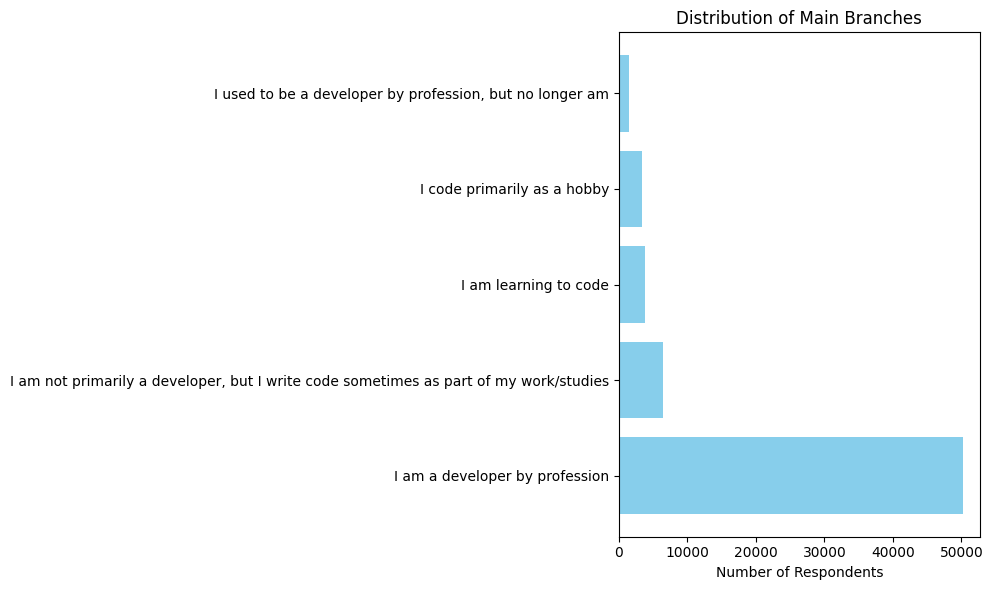

In [50]:
## Write your code here
# ## Write your code here

query = "SELECT MainBranch FROM main WHERE MainBranch IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Count occurrences
main_branch_counts = df['MainBranch'].value_counts()

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(main_branch_counts.index, main_branch_counts.values, color='skyblue')
plt.xlabel("Number of Respondents")
plt.title("Distribution of Main Branches")
plt.tight_layout()
plt.show()


### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [ ]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
